In [51]:
import pandas as pd
import numpy as np
from matplotlib import ticker
import matplotlib.pyplot as plt

In [41]:
def get_info_score(row, info_df):
    index = row['Unnamed: 0']
    return info_df.iloc[index]['Information Score']

def get_perplexity(row, perp_df):
    index = row['Unnamed: 0']
    return perp_df.iloc[index]['perplexity']


def combine_scores(human_eval_path, information_score_path, perplexity_path):
    human_data = pd.read_csv(human_eval_path)
    info_data = pd.read_csv(information_score_path)
    perp_data = pd.read_csv(perplexity_path)
    human_data['Information Score'] = human_data.apply(lambda row: get_info_score(row, info_data), axis=1)
    human_data['Perplexity'] = human_data.apply(lambda row: get_perplexity(row, perp_data), axis=1)
    return human_data

In [44]:
fcds_bart = combine_scores('fcds_bart_with_human_eval.csv', 'f22_bart_info_score.csv', 'f22_bart_perplexity.csv')
fcds_bert = combine_scores('fcds_bert_with_human_eval.csv', 'f22_bert2bert_info_score.csv', 'f22_bert2bert_perplexity.csv')
fcds_t5 = combine_scores('fcds_t5_with_human_eval.csv', 'f22_short_answer_e2e_qg_info_score.csv', 'f22_short_answer_e2e_qg_perplexity.csv')
fcds_gpt = combine_scores('fcds_gpt2_with_human_eval.csv', 'f22_gpt2_refined_info_score.csv', 'f22_gpt2_refined_perplexity.csv')
chem_bart = combine_scores('chem_bart_with_human_eval.csv', 'f22_chem_bart_info_score.csv', 'f22_chem_bart_perplexity.csv')
chem_bert = combine_scores('chem_bert_with_human_eval.csv', 'f22_chem_bert2bert_info_score.csv', 'f22_chem_bert2bert_perplexity.csv')
chem_t5 = combine_scores('chem_t5_with_human_eval.csv', 'f22_chem_t5_info_score.csv', 'f22_chem_t5_perplexity.csv')
chem_gpt = combine_scores('chem_gpt_with_human_eval.csv', 'f22_chem_gpt_info_score.csv', 'f22_chem_gpt_perplexity.csv')

In [45]:
fcds_bart.to_csv('combined_fcds_bart.csv')
fcds_bert.to_csv('combined_fcds_bert.csv')
fcds_t5.to_csv('combined_fcds_t5.csv')
fcds_gpt.to_csv('combined_fcds_gpt.csv')
chem_bart.to_csv('combined_chem_bart.csv')
chem_bert.to_csv('combined_chem_bert.csv')
chem_t5.to_csv('combined_chem_t5.csv')
chem_gpt.to_csv('combined_chem_gpt.csv')

In [46]:
def get_avg_perplexity(list_of_dfs): 
    sound = []
    not_sound = []
    for df in list_of_dfs:
        df_1 = df[df['human_eval']==1]
        sound.append(np.mean(df_1['Perplexity']))
        df_2 = df[df['human_eval']==0]
        not_sound.append(np.mean(df_2['Perplexity']))
    return np.mean(sound), np.mean(not_sound), sound, not_sound

def get_avg_info_score(list_of_dfs): 
    sound = []
    not_sound = []
    for df in list_of_dfs:
        df_1 = df[df['human_eval']==1]
        sound.append(np.mean(df_1['Information Score']))
        df_2 = df[df['human_eval']==0]
        not_sound.append(np.mean(df_2['Information Score']))
    return np.mean(sound), np.mean(not_sound), sound, not_sound

In [48]:
avg_perp_sound, avg_perp_not_sound, perps_sound, perps_not_sound = get_avg_perplexity([fcds_bart,fcds_bert,fcds_t5,fcds_gpt, chem_bart, chem_bert, chem_t5, chem_gpt])
avg_info_sound, avg_info_not_sound, infos_sound, infos_not_sound = get_avg_info_score([fcds_bart,fcds_bert,fcds_t5,fcds_gpt, chem_bart, chem_bert, chem_t5, chem_gpt])

In [50]:
print(avg_perp_sound, avg_perp_not_sound)
print()
print(avg_info_sound, avg_info_not_sound)

149.38256980892606 155.58676379697525
1.3769584075278898 1.1835443477841885


In [55]:
models = ['BART', 'bert2BERT','T5', 'GPT-2']
sound = perps_sound[0:4]
not_sound = perps_not_sound[0:4]
df = pd.DataFrame(sound, columns=['Sound'], index=models)
df['Not Sound'] = not_sound 

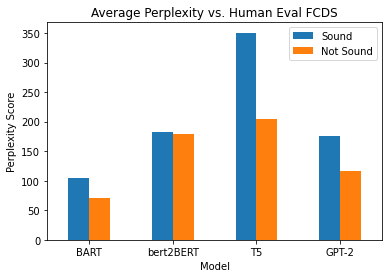

In [56]:
df.plot(kind='bar')
plt.ylabel('Perplexity Score')
plt.title('Average Perplexity vs. Human Eval FCDS')
plt.xlabel('Model')

plt.gca().xaxis.set_tick_params(rotation=0)

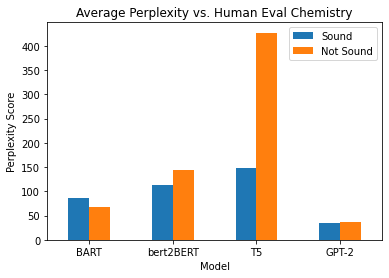

In [58]:
models = ['BART', 'bert2BERT','T5', 'GPT-2']
sound = perps_sound[4:]
not_sound = perps_not_sound[4:]
df = pd.DataFrame(sound, columns=['Sound'], index=models)
df['Not Sound'] = not_sound 

df.plot(kind='bar')
plt.ylabel('Perplexity Score')
plt.title('Average Perplexity vs. Human Eval Chemistry')
plt.xlabel('Model')

plt.gca().xaxis.set_tick_params(rotation=0)

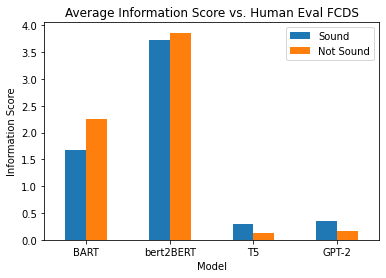

In [59]:
models = ['BART', 'bert2BERT','T5', 'GPT-2']
sound = infos_sound[0:4]
not_sound = infos_not_sound[0:4]
df = pd.DataFrame(sound, columns=['Sound'], index=models)
df['Not Sound'] = not_sound 

df.plot(kind='bar')
plt.ylabel('Information Score')
plt.title('Average Information Score vs. Human Eval FCDS')
plt.xlabel('Model')

plt.gca().xaxis.set_tick_params(rotation=0)

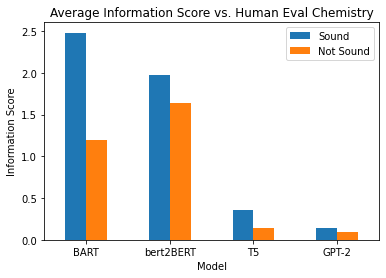

In [60]:
models = ['BART', 'bert2BERT','T5', 'GPT-2']
sound = infos_sound[4:]
not_sound = infos_not_sound[4:]
df = pd.DataFrame(sound, columns=['Sound'], index=models)
df['Not Sound'] = not_sound 

df.plot(kind='bar')
plt.ylabel('Information Score')
plt.title('Average Information Score vs. Human Eval Chemistry')
plt.xlabel('Model')

plt.gca().xaxis.set_tick_params(rotation=0)